# Problem statement 
Credit score cards are used in the financial industry to predict the likelihood of credit card defaults and guide the issuance of credit cards.These scores rely on the applicants' personal data and historical information , quantifying risk objectively.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Loading Dataset(Application Record)

In [3]:
df1=pd.read_csv('application_record.csv')

In [4]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


# Getting to know our dataset

In [5]:
#checking the shape of the application record dataset
df1.shape

(438557, 18)

In [6]:
#checking the dtypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
#changing the dtype of CNT_FAM_MEMBERS
df1['CNT_FAM_MEMBERS']=df1['CNT_FAM_MEMBERS'].astype(int)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

# Understand dataset (credit)

# Loading Dataset(Credit Record)

In [9]:
df2=pd.read_csv('credit_record.csv')

In [10]:
df2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [11]:
df2.shape

(1048575, 3)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [13]:
#Merging the two datasets on ID basis
df=pd.merge(df1,df2,on='ID',how='inner')

In [14]:
#Previewing the merged dataset
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-4,C


In [15]:
df.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-12,0
777714,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-13,0


In [16]:
#checking the shape of the dataset
df.shape

(777715, 20)

In [17]:
## checking the missing values
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [18]:
df['OCCUPATION_TYPE'].isna().sum()/df.shape[0]*100

30.86580559716606

In [19]:
df.drop('OCCUPATION_TYPE',axis=1,inplace=True)

In [20]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [21]:
##checking the unique values in each columns
df.nunique()

ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
CNT_FAM_MEMBERS           10
MONTHS_BALANCE            61
STATUS                     8
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
#df[df['ID'].duplicated()].sum()

In [24]:
df[df['ID'].duplicated()].head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-4,C
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-5,C


In [25]:
df[df['ID'].duplicated()].tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-12,0
777714,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-13,0


In [26]:
# renaming columns in a meaning full way

df.rename(columns={
    'CODE_GENDER': 'gender',
    'FLAG_OWN_CAR': 'own_car',
    'FLAG_OWN_REALTY': 'own_property',
    'CNT_CHILDREN': 'children',
    'AMT_INCOME_TOTAL': 'income',
    'NAME_INCOME_TYPE': 'income_type',
    'NAME_EDUCATION_TYPE': 'education',
    'NAME_FAMILY_STATUS': 'family_status',
    'NAME_HOUSING_TYPE': 'housing_type',
    'FLAG_MOBIL': 'mobile',
    'FLAG_WORK_PHONE': 'work_phone',
    'FLAG_PHONE': 'phone',
    'FLAG_EMAIL': 'email',
    'CNT_FAM_MEMBERS': 'family_members',
    'MONTHS_BALANCE': 'months_balance',
    'STATUS' : 'status',
    'DAYS_BIRTH' : 'age_in_days',
    'DAYS_EMPLOYED' : 'employment_in_days'

} , inplace=True)

In [27]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status'],
      dtype='object')

In [28]:
#checking for columns with object dtype
df.select_dtypes(include='object').columns

Index(['gender', 'own_car', 'own_property', 'income_type', 'education',
       'family_status', 'housing_type', 'status'],
      dtype='object')

In [29]:
df['loan_status'] = df['status'].map({'0': 'first_month_due' , '1': '2nd_month_due', '2' : '3rd_month_overdue',  '3': '4th_month_overdue',
                                '4' : '5th_month_overdue', '5' : 'bad_debt' , 'C': 'good' , 'X' : 'no_loan'})


In [30]:
df['status'].value_counts()

status
C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64

# EDA

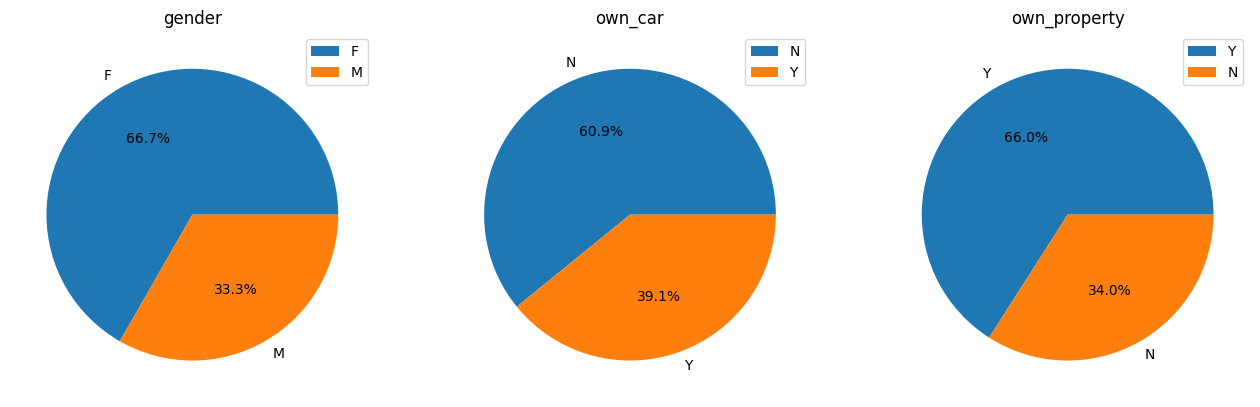

In [31]:
columns=['gender','own_car','own_property']
plt.figure(figsize=(16,9))
for i in range(len(columns)):
    plt.subplot(1,3,i+1)
    plt.title(columns[i])
    counts=df[columns[i]].value_counts()
    plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
    plt.legend(counts.index)
plt.show()

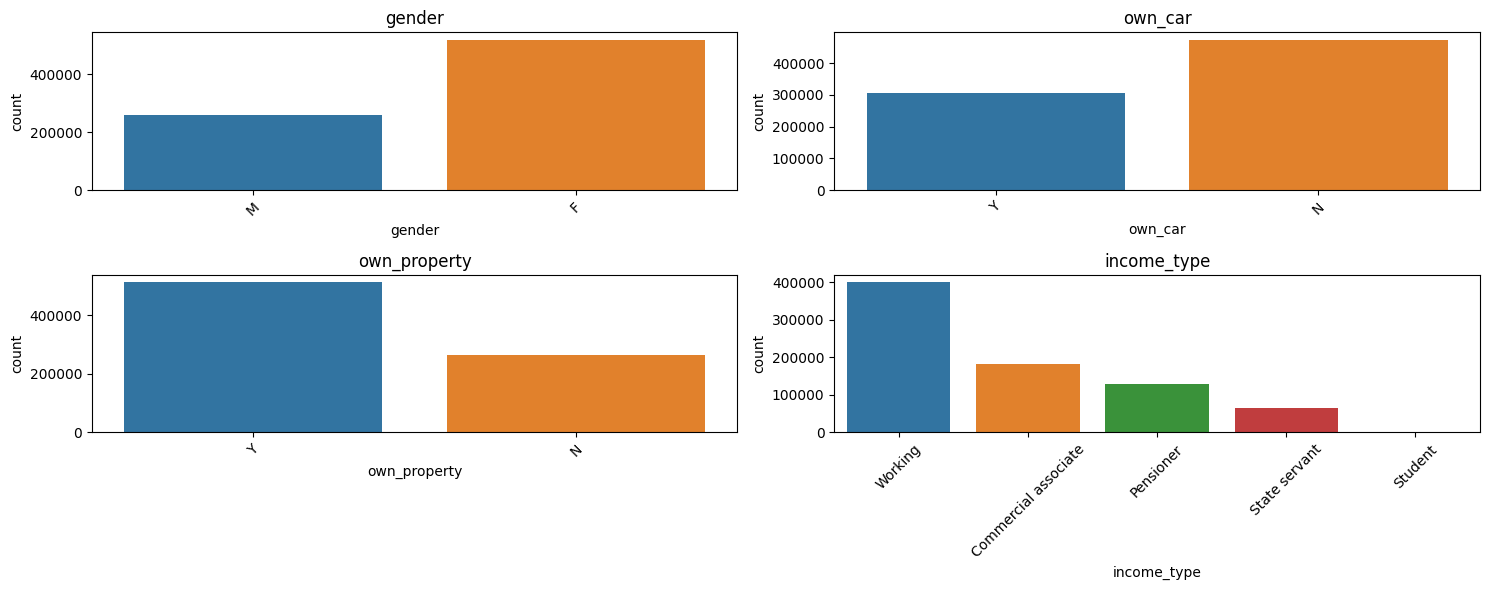

In [32]:
columns=['gender','own_car','own_property','income_type']
plt.figure(figsize=(15,6))
for i in range(len(columns)):
    plt.subplot(2,2,i+1)
    plt.title(columns[i])
    sns.countplot(data=df,x=df[columns[i]])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
df['loan_status'].value_counts()

loan_status
good                 329536
first_month_due      290654
no_loan              145950
2nd_month_due          8747
bad_debt               1527
3rd_month_overdue       801
4th_month_overdue       286
5th_month_overdue       214
Name: count, dtype: int64

# Income type vs Gender 

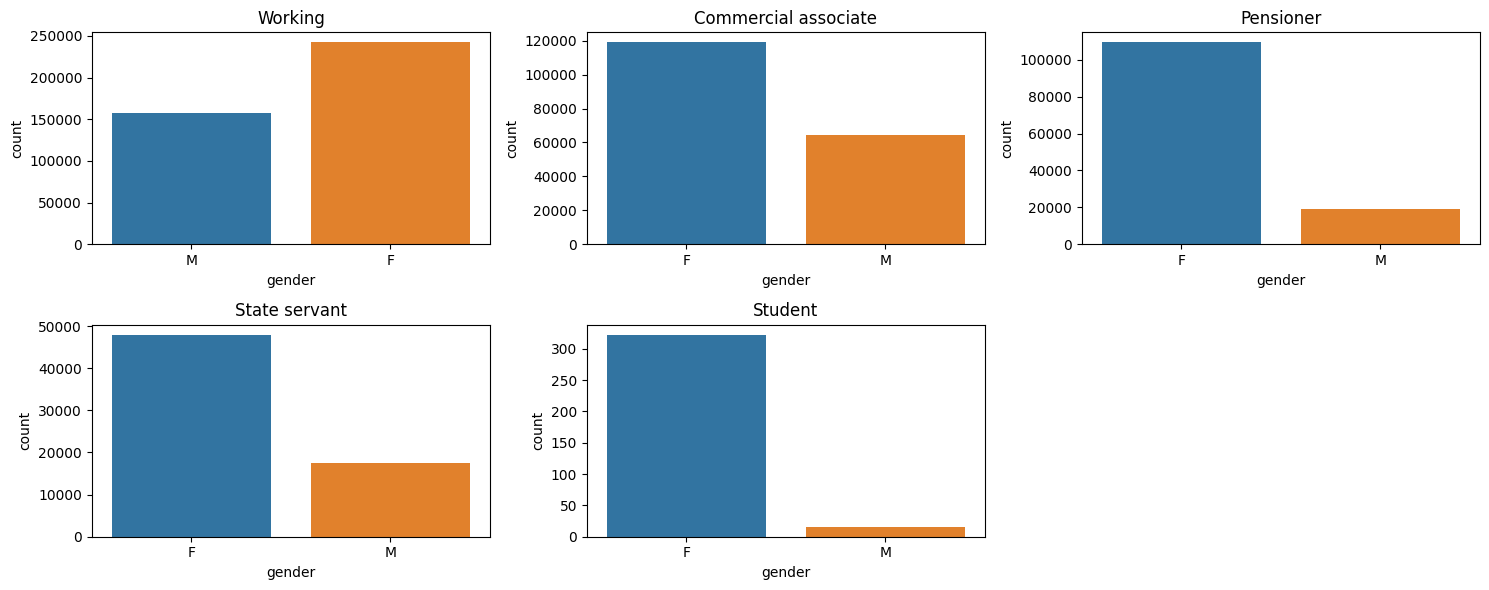

In [34]:
count=df['income_type'].value_counts()
plt.figure(figsize=(15,6))
for i in range(len(count)):
    plt.subplot(2,3,i+1)
    plt.title(count.index[i])
    sns.countplot(data=df[df['income_type']==count.index[i]],x='gender')
plt.tight_layout()
plt.show()

# loan status and income type

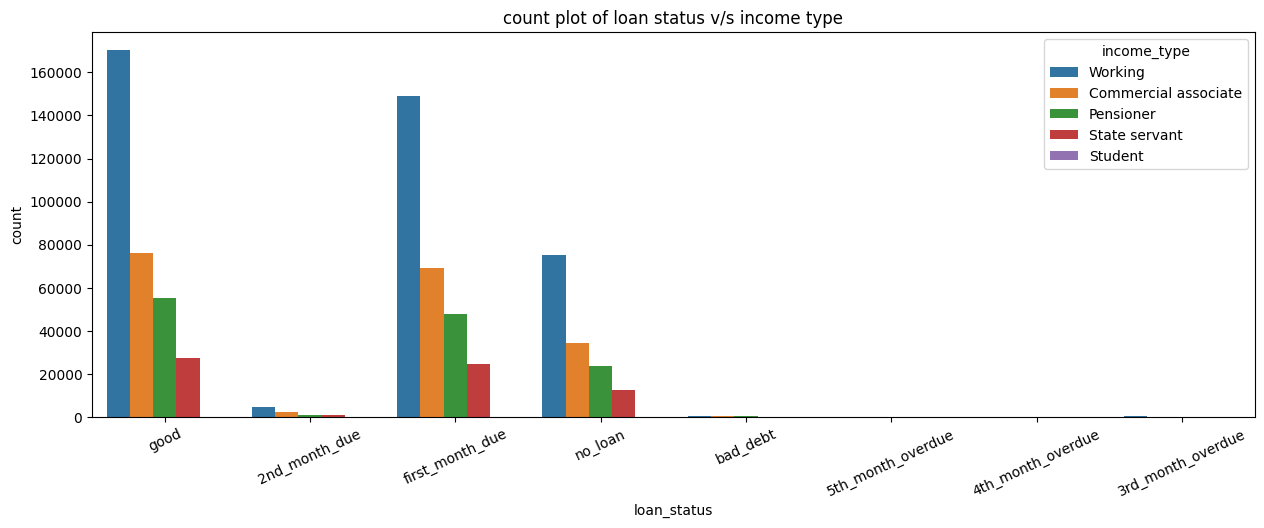

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x=df['loan_status'],hue=df['income_type'])
plt.title('count plot of loan status v/s income type')
plt.xticks(rotation=25)
plt.show()

# Education and gender

In [36]:
df.education.value_counts()

education
Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: count, dtype: int64

In [37]:
df.groupby('gender')['education'].value_counts()

gender  education                    
F       Secondary / secondary special    349975
        Higher education                 144457
        Incomplete higher                 18638
        Lower secondary                    5177
        Academic degree                     604
M       Secondary / secondary special    174286
        Higher education                  69176
        Incomplete higher                 11691
        Lower secondary                    3478
        Academic degree                     233
Name: count, dtype: int64

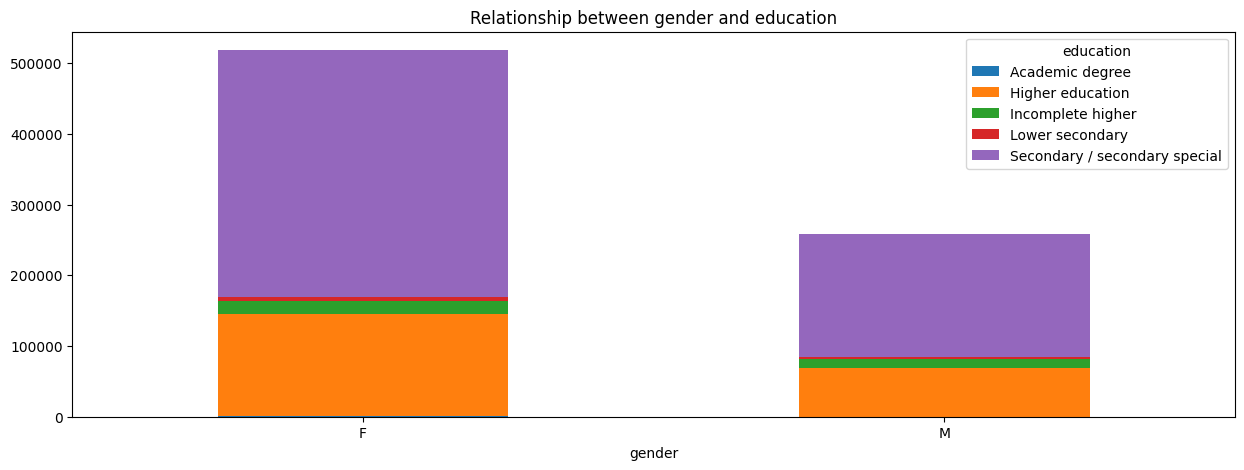

In [38]:
df.groupby('gender')['education'].value_counts().unstack().plot(kind='bar',figsize=(15,5),stacked=True)
plt.xticks(rotation=360)
plt.title('Relationship between gender and education')
plt.show()

Observation
 As our dataset has larget number of people with `secondary` education.
 Therefore, the number of male and female with `secondary` education is high.
 Moreover, the number of `Lower_secondary & Academic degree` is very less in both male and female
 The proportion of `Lower_secondary` eduaction is similar for both genders

# Insights From education and loan Status

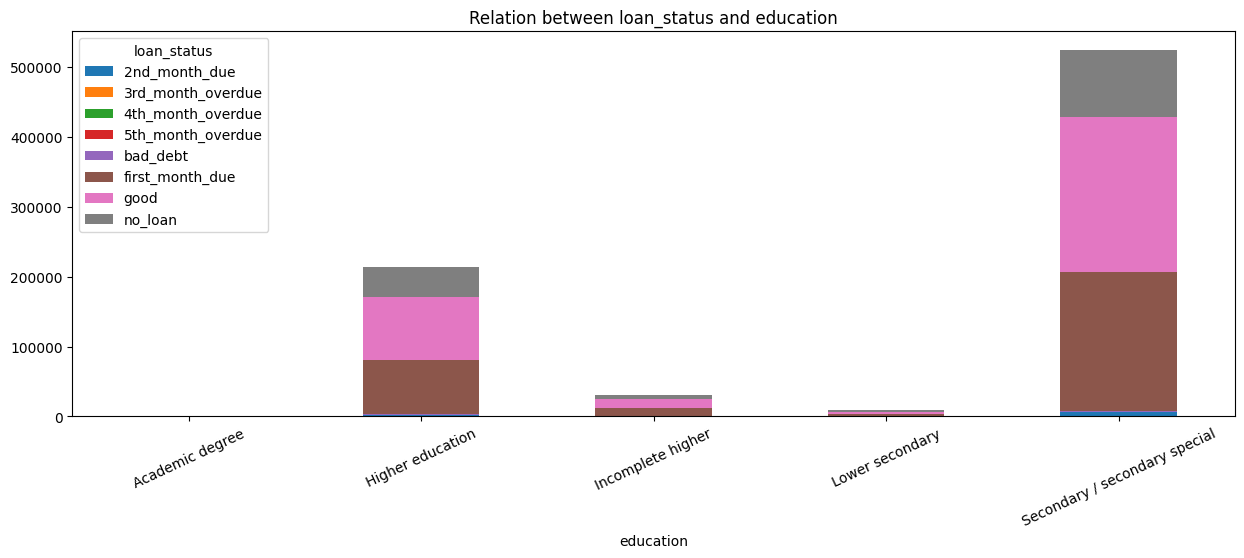

In [39]:
df.groupby('education')[['loan_status']].value_counts().unstack().plot(kind='bar',figsize=(15,5),stacked=True)
plt.title('Relation between loan_status and education')
plt.xticks(rotation=25)
plt.show()

# Insights from housing_type and loan_status

In [41]:
#checking the unique enteries from housing_type
df['housing_type'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [42]:
df['housing_type'].value_counts()

housing_type
House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: count, dtype: int64

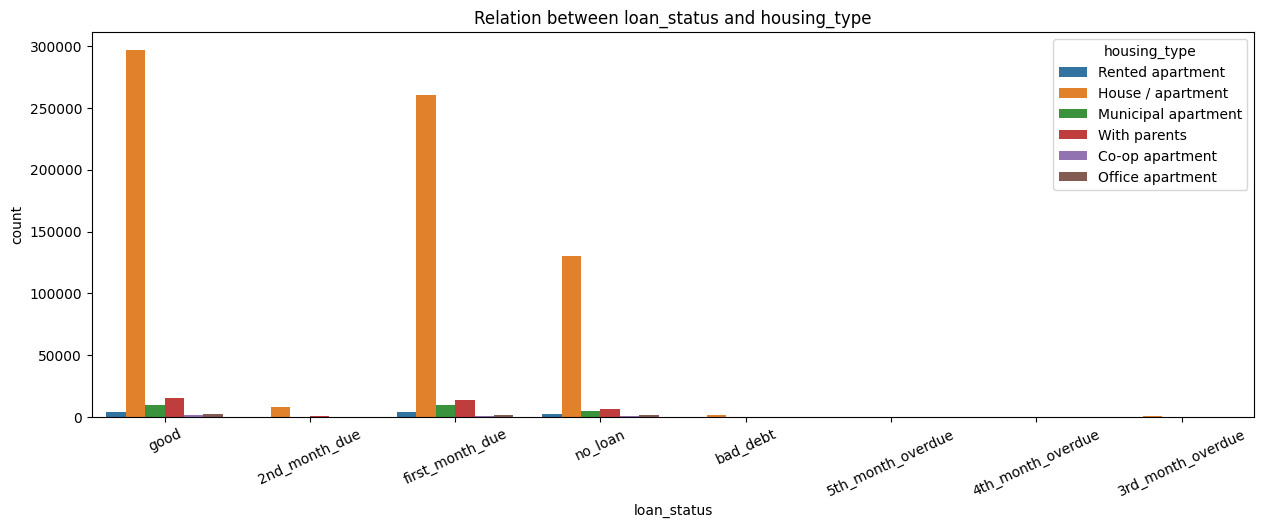

In [43]:
#checking the relationship between loan_status and housing type
plt.figure(figsize=(15,5))
sns.countplot(data=df,x=df['loan_status'],hue=df['housing_type'])
plt.xticks(rotation=25)
plt.title('Relation between loan_status and housing_type')
plt.show()

In [44]:
#filtering the value counts housing & loan_status==bad_debt
count=df.groupby(['housing_type','loan_status']).size()
bad_loan=count[count.index.get_level_values('loan_status')=='bad_debt']
bad_loan

housing_type         loan_status
Co-op apartment      bad_debt         16
House / apartment    bad_debt       1368
Municipal apartment  bad_debt         54
Office apartment     bad_debt         14
Rented apartment     bad_debt         29
With parents         bad_debt         46
dtype: int64

# Insights from family_members and loan_status

In [45]:
df.family_members.value_counts()

family_members
2     423723
1     141477
3     134894
4      66990
5       8999
6       1196
7        273
15       111
9         46
20         6
Name: count, dtype: int64

In [46]:
df.groupby(['family_members'])[['loan_status']].value_counts().unstack()

loan_status,2nd_month_due,3rd_month_overdue,4th_month_overdue,5th_month_overdue,bad_debt,first_month_due,good,no_loan
family_members,,,,,,,,
1,1651.0,179.0,71.0,52.0,239.0,53411.0,59894.0,25980.0
2,4571.0,414.0,161.0,108.0,808.0,157392.0,181131.0,79138.0
3,1528.0,132.0,34.0,34.0,381.0,50885.0,54889.0,27011.0
4,858.0,54.0,15.0,18.0,92.0,25110.0,29037.0,11806.0
5,108.0,21.0,4.0,1.0,5.0,3234.0,4068.0,1558.0
6,16.0,1.0,1.0,1.0,2.0,463.0,442.0,270.0
7,NaN,NaN,NaN,NaN,NaN,57.0,53.0,163.0
9,10.0,NaN,NaN,NaN,NaN,14.0,22.0,NaN
15,5.0,NaN,NaN,NaN,NaN,82.0,NaN,24.0


# Insights from children count and loan_status

In [47]:
df.children.value_counts()

children
0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: count, dtype: int64

In [49]:
df.groupby('children')[['loan_status']].value_counts().unstack()

loan_status,2nd_month_due,3rd_month_overdue,4th_month_overdue,5th_month_overdue,bad_debt,first_month_due,good,no_loan
children,,,,,,,,
0,5908.0,559.0,213.0,146.0,994.0,201794.0,230268.0,100757.0
1,1801.0,156.0,51.0,46.0,434.0,58550.0,64120.0,30480.0
2,888.0,64.0,17.0,20.0,92.0,26171.0,30485.0,12662.0
3,119.0,21.0,4.0,1.0,5.0,3468.0,4143.0,1567.0
4,16.0,1.0,1.0,1.0,2.0,490.0,416.0,297.0
5,NaN,NaN,NaN,NaN,NaN,79.0,82.0,163.0
7,10.0,NaN,NaN,NaN,NaN,14.0,22.0,NaN
14,5.0,NaN,NaN,NaN,NaN,82.0,NaN,24.0
19,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN


# Relation between Unemployement and loan status

In [51]:
filtered_df=df[df['employment_in_days']>0]
filtered_df.groupby('loan_status').size()

loan_status
2nd_month_due         1128
3rd_month_overdue      149
4th_month_overdue       73
5th_month_overdue       37
bad_debt               266
first_month_due      47620
good                 55172
no_loan              23527
dtype: int64

In [52]:
df.to_csv('eda.csv', index=False)